In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.model_selection import train_test_split

**MACHINE LEARNING MODEL**

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
features = list(df.columns)
target = features.pop()

X = df[features].copy()
y = df[target].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 4)

In [ ]:
clf = DecisionTreeClassifier(
    max_depth=3,
    criterion='entropy',
    random_state=4)

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

In [ ]:
accuracy_score(clf.predict(X_test), y_test)

0.9666666666666667

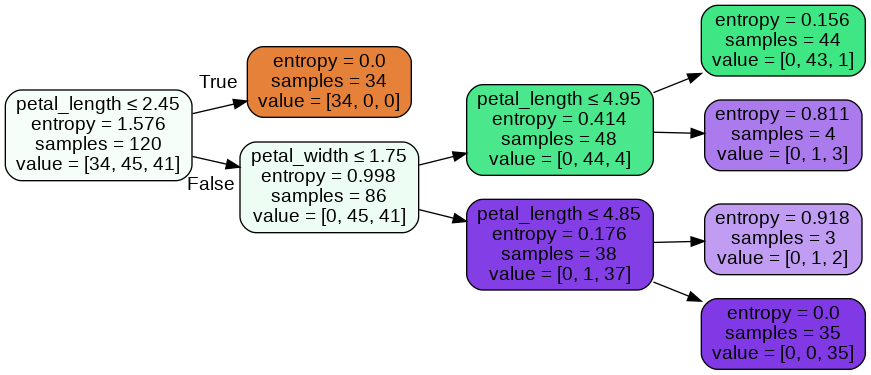

In [ ]:
def plot_tree_classifier(clf, feature_names=None):
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_names,
        filled=True,
        rounded=True,
        special_characters=True,
        rotate=True)

    return Image(graphviz.Source(dot_data).pipe(format='png'))

display(plot_tree_classifier(clf, feature_names=features))

**Deep Learning Model**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import date         
import pandas_datareader as pdr

from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
yesterday = datetime.datetime.strftime(datetime.datetime.now()-datetime.timedelta(1),'%Y-%m-%d')
yesterday = pd.to_datetime(yesterday)
six = datetime.datetime.strftime(datetime.datetime.now()-datetime.timedelta(6*365),'%Y-%m-%d')
six = pd.to_datetime(six)

In [3]:
aapl = pdr.DataReader('AAPL', 'yahoo', six, yesterday)
aapl 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-22,32.014999,31.770000,31.872499,31.902500,136157200.0,29.204836
2015-06-23,31.902500,31.719999,31.870001,31.757500,121075600.0,29.072098
2015-06-24,32.450001,31.780001,31.802500,32.027500,221123600.0,29.319269
2015-06-25,32.299999,31.875000,32.215000,31.875000,127752400.0,29.179665
2015-06-26,31.997499,31.627501,31.917500,31.687500,176267200.0,29.008015
...,...,...,...,...,...,...
2021-06-11,127.440002,126.099998,126.529999,127.349998,53415300.0,127.349998
2021-06-14,130.539993,127.070000,127.820000,130.479996,96906500.0,130.479996
2021-06-15,130.600006,129.389999,129.940002,129.639999,62746300.0,129.639999


In [4]:
split_num = round(len(aapl)*0.8)
x_train_set, y_train_set  = aapl.iloc[:split_num]['Open'].values, aapl.iloc[:split_num]['Close'].values

In [5]:
x_train_set = x_train_set.reshape(-1,1)
x_train_set

array([[31.87249947],
       [31.87000084],
       [31.80249977],
       ...,
       [60.08499908],
       [60.70000076],
       [62.72499847]])

In [6]:
y_train_set = y_train_set.reshape(-1,1)
y_train_set

array([[31.90250015],
       [31.75749969],
       [32.02750015],
       ...,
       [61.23249817],
       [60.35250092],
       [65.61750031]])

In [7]:
def func(x_train_set,y_train_set):

    # Feature Scaling
    sc = MinMaxScaler(feature_range = (0, 1))
    x_train_scaled = sc.fit_transform(x_train_set)
    y_train_scaled = sc.fit_transform(y_train_set)

    # Creating a data structure with 60 time-steps and 1 output
    X_train = []
    y_train = []

    ## for every 60 scaled open prices, append one output 
    ## lookback 60 days of open prices to predict one close price
    for i in range(60, split_num):
        X_train.append(x_train_scaled[i-60:i, 0])
        y_train.append(y_train_scaled[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 
    
    return X_train, y_train

X_train, y_train = func(x_train_set, y_train_set)

In [8]:
print('SHAPE', X_train.shape)
print()
print('FINALIZED FEATURE DATA')
print(X_train)

SHAPE (1147, 60, 1)

FINALIZED FEATURE DATA
[[[0.15970861]
  [0.15966603]
  [0.15851581]
  ...
  [0.09282611]
  [0.11323167]
  [0.11046265]]

 [[0.15966603]
  [0.15851581]
  [0.16554487]
  ...
  [0.11323167]
  [0.11046265]
  [0.11182585]]

 [[0.15851581]
  [0.16554487]
  [0.16047542]
  ...
  [0.11046265]
  [0.11182585]
  [0.10931245]]

 ...

 [[0.89392522]
  [0.88250836]
  [0.92544943]
  ...
  [0.68475766]
  [0.70546142]
  [0.66669509]]

 [[0.88250836]
  [0.92544943]
  [0.93976321]
  ...
  [0.70546142]
  [0.66669509]
  [0.64045328]]

 [[0.92544943]
  [0.93976321]
  [0.94419368]
  ...
  [0.66669509]
  [0.64045328]
  [0.65093299]]]


In [9]:
print('SHAPE', y_train.shape)
print()
print('FINALIZED TARGET DATA')
print(y_train)

SHAPE (1147,)

FINALIZED TARGET DATA
[0.11006504 0.09955248 0.09756818 ... 0.65266396 0.63780291 0.72671618]


In [12]:
def build_and_train_model(X_train, y_train, optimizer, loss, epochs):

    """ 
    This function builds and trains a keras LSTM model

    Parameters: 
    X_train --> training feature data 
    y_train --> training target data 
    optimizer --> string
    loss --> string 
    epochs --> int

    Returns:
    trained keras model
    """

    model = Sequential()

    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))

    # Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 64, return_sequences = True))
    model.add(Dropout(0.2))

    # Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 32, return_sequences = True))
    model.add(Dropout(0.2))

    # Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 16))
    model.add(Dropout(0.2))

    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the RNN
    model.compile(optimizer = optimizer, loss = loss)

    # Fitting the RNN to the Training set
    model.fit(X_train, y_train, epochs = epochs, batch_size = 32)

    return model

model = build_and_train_model(X_train, y_train, optimizer='adam', loss='mean_squared_error', epochs=25)

Epoch 1/25
36/36 [==============================] - 14s 163ms/step - loss: 0.0432
Epoch 2/25
36/36 [==============================] - 6s 160ms/step - loss: 0.0069
Epoch 3/25
36/36 [==============================] - 6s 163ms/step - loss: 0.0065
Epoch 4/25
36/36 [==============================] - 6s 162ms/step - loss: 0.0058
Epoch 5/25
36/36 [==============================] - 6s 164ms/step - loss: 0.0046
Epoch 6/25
36/36 [==============================] - 6s 160ms/step - loss: 0.0047
Epoch 7/25
36/36 [==============================] - 6s 158ms/step - loss: 0.0044
Epoch 8/25
36/36 [==============================] - 6s 156ms/step - loss: 0.0045
Epoch 9/25
36/36 [==============================] - 6s 161ms/step - loss: 0.0053
Epoch 10/25
36/36 [==============================] - 6s 158ms/step - loss: 0.0035
Epoch 11/25
36/36 [==============================] - 6s 156ms/step - loss: 0.0046
Epoch 12/25
36/36 [==============================] - 6s 160ms/step - loss: 0.0039
Epoch 13/25
36/36 [=====

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 64)            49408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 32)            12416     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 16)               

In [14]:
most_recent_60 = aapl.iloc[len(aapl)-60:]['Open'].values
most_recent_60 = np.array(most_recent_60)
most_recent_60 = most_recent_60.reshape(-1,1)

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
most_recent_60_scaled = sc.fit_transform(most_recent_60)
most_recent_60_scaled = np.reshape(most_recent_60_scaled, (most_recent_60_scaled.shape[1], most_recent_60_scaled.shape[0], 1))

preds = model.predict(most_recent_60_scaled)
preds_ = sc.inverse_transform(preds)

print('PREDICTED AAPL CLOSE PRICE FOR 06/17/2021', preds_)
print('ACTUAL AAPL CLOSE PRICE FOR 06/17/2021', most_recent_60[-1])

PREDICTED AAPL CLOSE PRICE FOR 06/17/2021 [[126.6813]]
ACTUAL AAPL CLOSE PRICE FOR 06/17/2021 [129.80000305]
